In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

from sklearn.preprocessing import MinMaxScaler

In [116]:
def xg_boost_pred(financial_data: pd.DataFrame,record_to_plot):
    financial_data = financial_data[:record_to_plot]
    tscv = TimeSeriesSplit(n_splits=4)
    scaler = MinMaxScaler(feature_range=(0, 1))
    reports= {
        "MAE":[],
        "MSE":[],
        "RMSE":[],
        "R2":[]
    }
    for train_index, test_index in tscv.split(financial_data):
        train_data, test_data = financial_data.iloc[train_index], financial_data.iloc[test_index]
        train_data, test_data = train_data["Close"], test_data["Close"]
        
        
        X_train, y_train = train_data.iloc[:-1], train_data.iloc[1:]
        X_test, y_test = test_data.iloc[:-1], test_data.iloc[1:]

        X_train = np.array(X_train).reshape(-1, 1)
        X_test = np.array(X_test).reshape(-1, 1)
        y_train = np.array(y_train).reshape(-1, 1)
        y_test = np.array(y_test).reshape(-1, 1)
     
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        y_train = scaler.fit_transform(y_train)
        y_test = scaler.transform(y_test)
     
            

        # Fit and transform with the same scaler
        model = XGBRegressor()
        
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print("Initial prediction")
        statistics(y_test, y_pred,reports)
        
        plt.figure(figsize=(10, 5))
        x = np.arange(0, len(X_test), 1)
        plt.plot(x, y_test, marker='.', label="actual")
        plt.plot(x, y_pred, 'r', label="prediction")
        plt.tight_layout()
    
   
        plt.title('XGBoost Prediction')
        plt.xlabel('Observation')
        plt.ylabel('Close Scaled')
        plt.legend()
        plt.show()
    
    print("Average MAE: ",np.mean(reports["MAE"]))
    print("Average MSE: ",np.mean(reports["MSE"]))
    print("Average RMSE: ",np.mean(reports["RMSE"]))
    print("Average R2: ",np.mean(reports["R2"]))
    """param_grid = {
        'learning_rate': [0.1,0.05],
        'max_depth': [10],
        'subsample': [0.5, 0.7],
        'n_estimators': [1000]
         }

        # Perform the grid search
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
        grid_search.fit(X_train, y_train)
        
        

        # Print the best hyperparameters
        print(grid_search.best_params_)

        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        print("After hyperparameter tuning")
        statistics(y_test, y_pred)


        plt.figure(figsize=(10, 5))
        x = np.arange(0, len(X_test), 1)
        plt.plot(x, y_test, marker='.', label="actual")
        plt.plot(x, y_pred, 'r', label="prediction")
        plt.tight_layout()
    
   
        plt.title('XGBoost Prediction')
        plt.xlabel('Observation')
        plt.ylabel('Close Scaled')
        plt.legend()
        plt.show()
"""
def statistics(y_test, y_pred,reports):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Absolute Error (MAE): {mae:.3f}')
    print(f'Mean Squared Error (MSE): {mse:.3f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.3f}')
    print(f'R-squared (R2) Score: {r2:.3f}')
    reports["MAE"].append(mae)
    reports["MSE"].append(mse)
    reports["RMSE"].append(rmse)
    reports["R2"].append(r2)
    

In [117]:
financial_data = pd.read_csv(
    "..\data\EURUSD_Candlestick_4_Hour_ASK_05.05.2003-16.10.2021.csv")

# delete dollar sign
try:
    # Clean up dollar signs and convert columns to numeric values
    financial_data["Close/Last"] = financial_data["Close/Last"].str.replace(
        "$", "").astype(float)
    financial_data["Open"] = financial_data["Open"].str.replace(
        "$", "").astype(float)
    financial_data["High"] = financial_data["High"].str.replace(
        "$", "").astype(float)
    financial_data["Low"] = financial_data["Low"].str.replace(
        "$", "").astype(float)
except Exception:
    pass

# rename the headers
try:
    financial_data.rename(columns={"Close/Last": "Close"}, inplace=True)
except Exception:
    pass

In [118]:
financial_data.rename(columns={"high": "High"}, inplace=True)
financial_data.rename(columns={"low": "Low"}, inplace=True)
financial_data.rename(columns={"open": "Open"}, inplace=True)
financial_data.rename(columns={"volume": "Volume"}, inplace=True)
financial_data.rename(columns={"close": "Close"}, inplace=True)


financial_data = financial_data.reset_index(drop=True)

Initial prediction
Mean Absolute Error (MAE): 0.128
Mean Squared Error (MSE): 0.027
Root Mean Squared Error (RMSE): 0.164
R-squared (R2) Score: -0.529


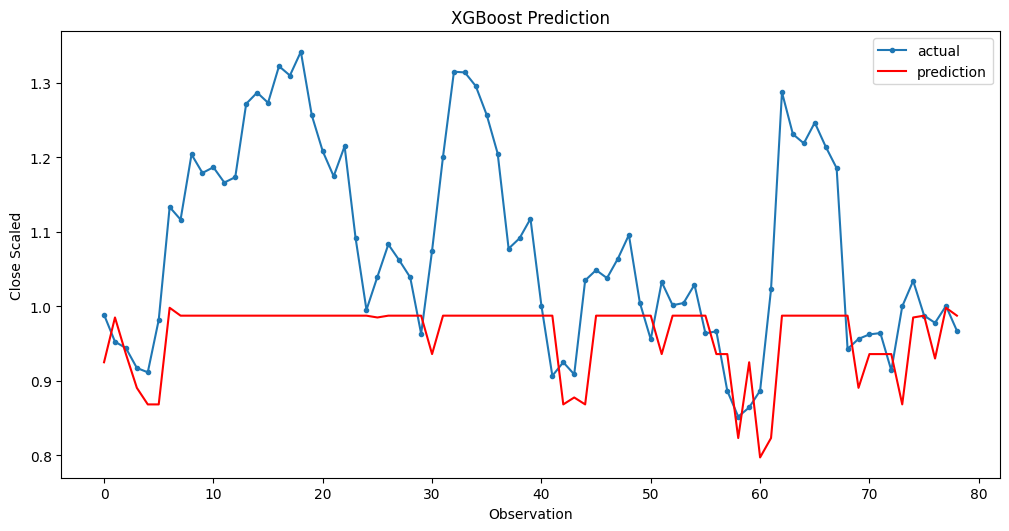

Initial prediction
Mean Absolute Error (MAE): 0.048
Mean Squared Error (MSE): 0.004
Root Mean Squared Error (RMSE): 0.065
R-squared (R2) Score: 0.890


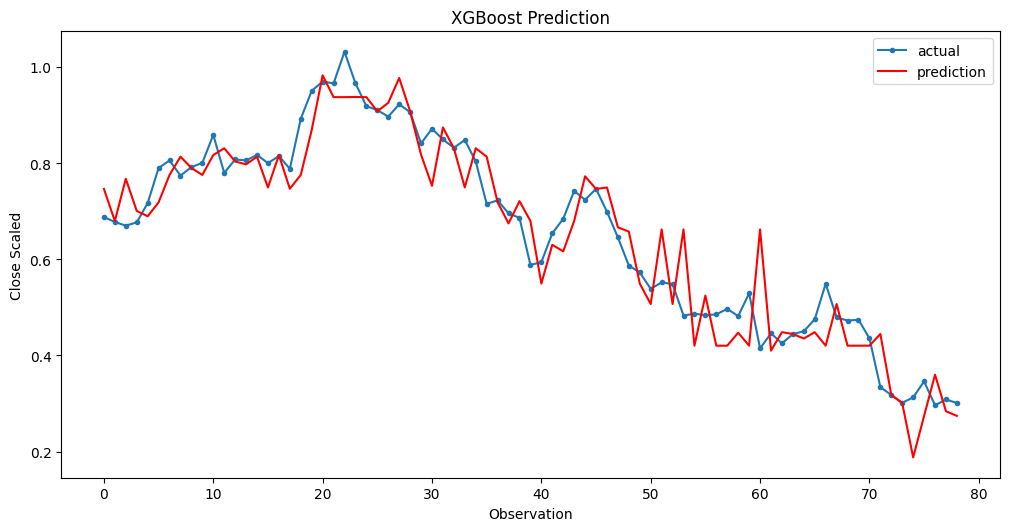

Initial prediction
Mean Absolute Error (MAE): 0.051
Mean Squared Error (MSE): 0.005
Root Mean Squared Error (RMSE): 0.068
R-squared (R2) Score: 0.833


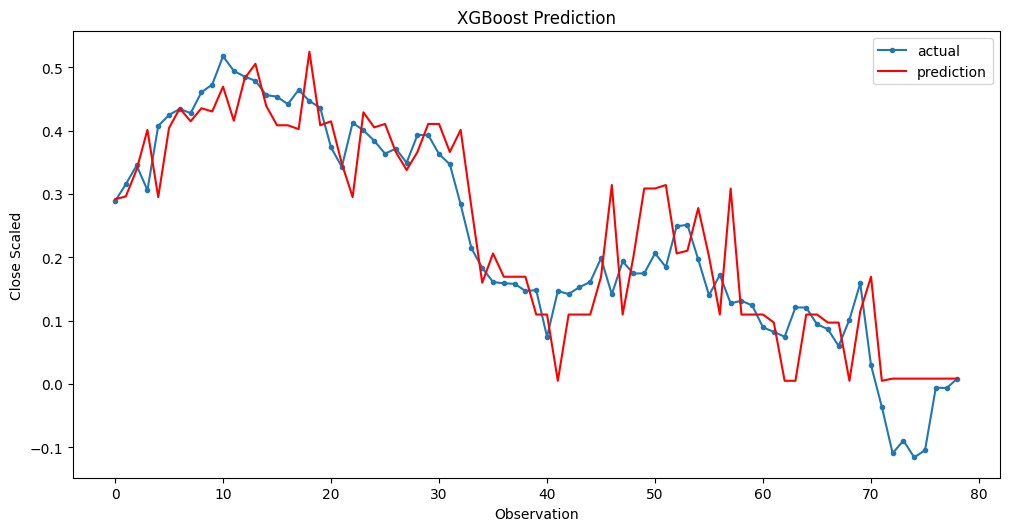

Initial prediction
Mean Absolute Error (MAE): 0.047
Mean Squared Error (MSE): 0.003
Root Mean Squared Error (RMSE): 0.058
R-squared (R2) Score: 0.807


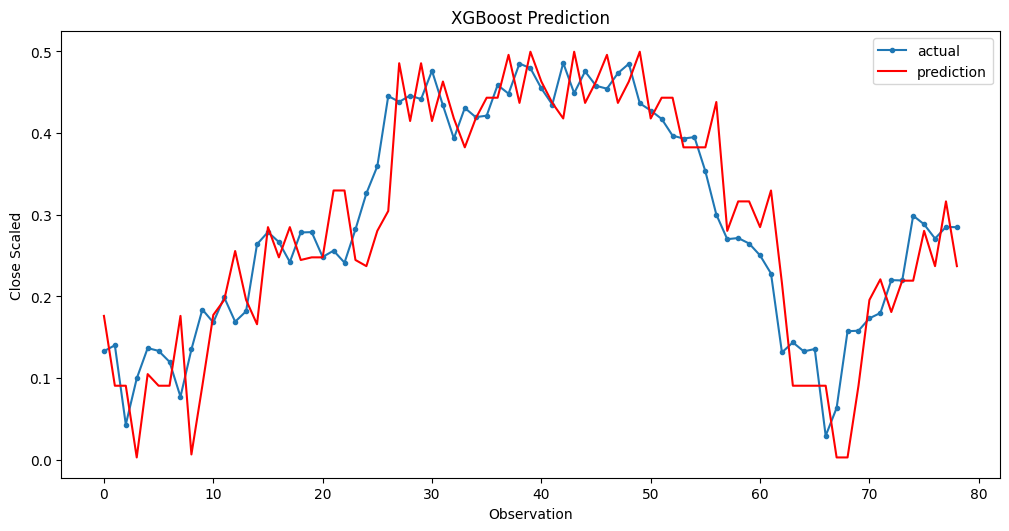

Average MAE:  0.06846631719276611
Average MSE:  0.009769801999597023
Average RMSE:  0.08865082244598545
Average R2:  0.5002538711868663


In [119]:
xg_boost_pred(financial_data,record_to_plot=400)